<a href="https://colab.research.google.com/github/Crinmatic/AI-world/blob/main/DDoS_attack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_all_numeric.csv")
df.head(20)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True
5,31.0,2.0,1.0,2.0,111.0,582.52,0.08,12.25,47.55,7135.87,0.19,396.44,19,0,5,0,14.0,24.0,69.0,42.0,3.0,True
6,78.0,9.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0.0,0.0,0.0,17.0,True
7,8.0,1.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,0.02,7.89,5,0,1,0,4.0,5.0,9.0,7.0,1.0,True
8,24.0,2.0,1.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0.0,0.0,0.0,3.0,True
9,143.0,22.0,20.0,10.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0.0,0.0,0.0,43.0,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            108

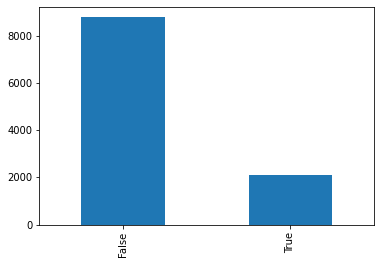

In [3]:
df.defects.value_counts().plot(kind='bar')

In [4]:
# check if there are any missing values. If there are, then we need to replace them 
# or remove them. 
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

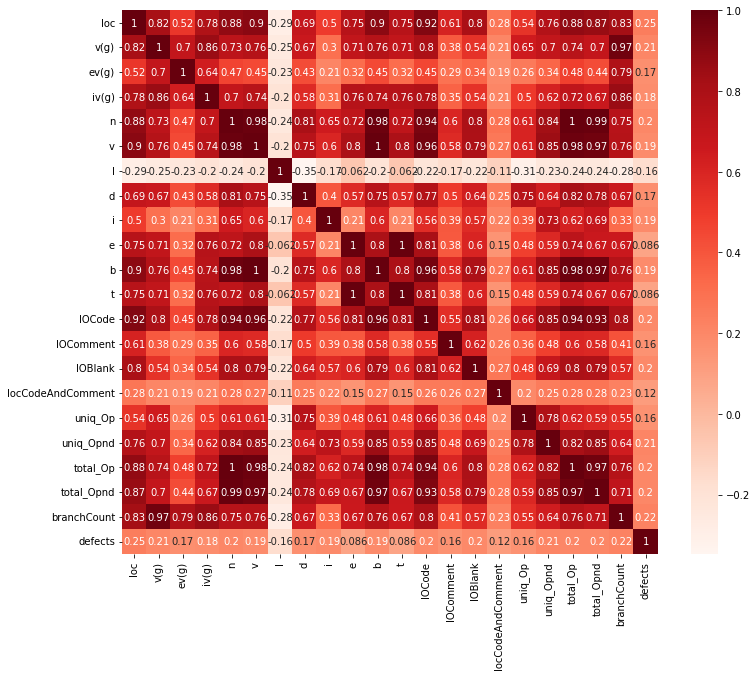

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
def drop_corr_features(df):
    cor_matrix = df.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    return df.drop(columns=to_drop)

In [10]:
import numpy as np
new_df =drop_corr_features(df)

In [12]:
X = new_df.drop(columns=['defects'])
y = df['defects']

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

In [14]:
from sklearn.model_selection import train_test_split
YY = ['Defect' if y else 'None_Defect' for y in Y]
X_train, X_test, y_train, y_test = train_test_split(X, YY, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
rf.feature_importances_

array([0.15113893, 0.08014748, 0.04817201, 0.06704596, 0.08765492,
       0.03826015, 0.08105158, 0.09287353, 0.09027067, 0.04322734,
       0.06742362, 0.02082505, 0.05657287, 0.07533591])

<BarContainer object of 14 artists>

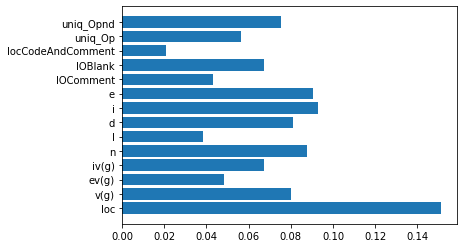

In [17]:
plt.barh(X_train.keys(), rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

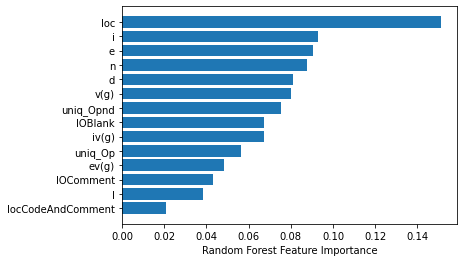

In [18]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.keys()[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [19]:
rf.feature_importances_[sorted_idx]

array([0.02082505, 0.03826015, 0.04322734, 0.04817201, 0.05657287,
       0.06704596, 0.06742362, 0.07533591, 0.08014748, 0.08105158,
       0.08765492, 0.09027067, 0.09287353, 0.15113893])

In [20]:
# use features with importance greater than 0.06
idex  = rf.feature_importances_[sorted_idx]>0.06

In [21]:
X_train[X_train.keys()[sorted_idx][idex].values]

,iv(g),lOBlank,uniq_Opnd,v(g),d,n,e,i,loc
2179,2.0,5,32.0,3.0,9.38,106.0,5425.31,61.73,31.0
8843,6.0,5,30.0,12.0,36.40,222.0,46504.09,35.10,63.0
3753,5.0,4,17.0,5.0,19.59,98.0,9846.41,25.66,22.0
10521,4.0,1,118.0,4.0,17.54,600.0,74259.84,241.31,100.0
2055,10.0,42,56.0,70.0,48.12,878.0,261494.78,112.95,202.0
...,...,...,...,...,...,...,...,...,...
4859,1.0,0,0.0,1.0,0.00,0.0,0.00,0.00,15.0
3264,8.0,0,0.0,8.0,0.00,0.0,0.00,0.00,42.0
9845,1.0,0,5.0,1.0,3.50,16.0,186.03,15.19,4.0
10799,1.0,0,4.0,1.0,2.50,10.0,79.25,12.68,5.0


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
stf = StratifiedKFold(n_splits=3, random_state=1234, shuffle = True)
stf.get_n_splits(X,y)
scoresss = []
f1_Algo1= []

for train, test in stf.split(X,y):
    x_train, x_test = X[train], X[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    svm = SVc()
    svm.fit(X,y,eval_set=[(x_train,y_train), (x_test,y_test)],early_stopping_rounds= 1000, eval_metric  = 'logloss')

In [ ]:
scoresss.append(accuracy_score(y_test,svm.predict(x_test)))

In [ ]:
f1_Algo1.append(f1_score(y_test,svm.predict(x_test),  average='micro'))

In [ ]:
import numpy as np
np.mean(scoresss)

In [ ]:
np.mean(f1_Algo1)

In [ ]:
score_train = svm.score(x_train, y_train)
score_test = svm.score(x_test, y_test)

In [ ]:
print("Accuracy train set:", score_train)
print("Accuracy test set:", score_test)

In [ ]:
# Check how well the model Classified the data
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
svm_pred = svm.predict(x_test)
con_matrix = np.array(confusion_matrix(y_test, svm_pred ))
print("Confusion matrix:\n" , con_matrix)
sns.heatmap(con_matrix, annot =True)
class_report = classification_report(y_test, svm_pred, 
                                    )
print("Classification report : \n" , class_report)